In [1]:

# 1. Import Libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

# 2. Load & Preprocess Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:

# 3. Define the Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# 4. Train the Model
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1
)


Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 67s 95ms/step - accuracy: 0.8617 - loss: 0.3943 - val_accuracy: 0.7074 - val_loss: 1.0429
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 76s 87ms/step - accuracy: 0.8723 - loss: 0.3678 - val_accuracy: 0.6958 - val_loss: 1.1440
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.8757 - loss: 0.3547 - val_accuracy: 0.6874 - val_loss: 1.1591
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 80s 84ms/step - accuracy: 0.8807 - loss: 0.3401 - val_accuracy: 0.6946 - val_loss: 1.1838
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 60s 85ms/step - accuracy: 0.8914 - loss: 0.3067 - val_accuracy: 0.6874 - val_loss: 1.2473
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 59s 83ms/step - accuracy: 0.8919 - loss: 0.3133 - val_accuracy: 0.6910 - val_loss: 1.2654
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 84s 86ms/step - accuracy: 0.9001 - loss: 0.2889 - val_accuracy: 0.6916 - val_loss: 1.3011
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 87ms/step - accuracy: 0.9057 - loss: 0.2687 - 

In [ ]:
# 5. Evaluate on Test Set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6557 - loss: 2.1470
Test Accuracy: 0.6505


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


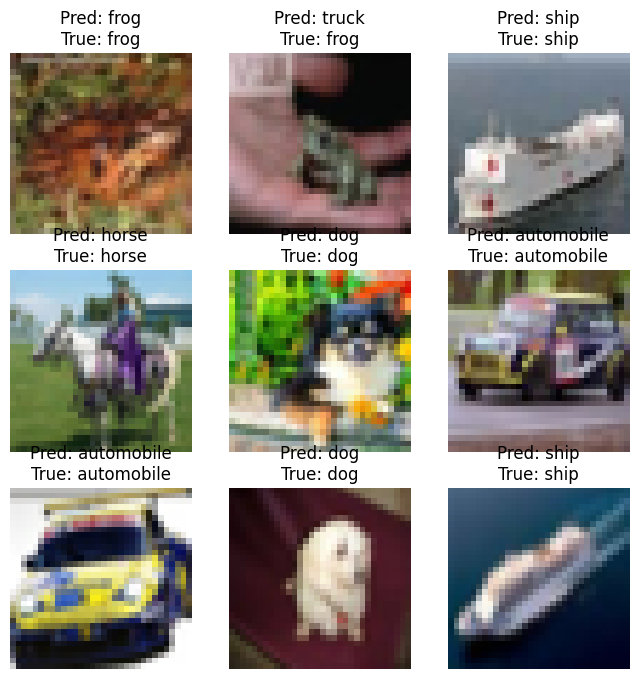

In [ ]:

# 6. Visualize Sample Predictions
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(8,8))
indices = np.random.choice(len(x_test), 9, replace=False)
for i, idx in enumerate(indices):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[idx])
    pred = np.argmax(model.predict(x_test[idx:idx+1]))
    plt.title(f"Pred: {class_names[pred]}\nTrue: {class_names[y_test[idx]]}")
    plt.axis('off')
plt.show()
